In [ ]:
!jupyter nbextension enable --py --sys-prefix widgetsnbextension
!pip install gmaps
!jupyter nbextension enable --py --sys-prefix gmaps


In [ ]:
# Dependencies
from census import Census
from api_keys import (weather_api_key, g_key)
import gmaps
import numpy as np
import pandas as pd
import requests
import time
import json
from scipy.stats import linregress
from matplotlib import pyplot as plt
from citipy import citipy


#REMOVE THESE! TEsting api import
print(weather_api_key)
print(g_key)

In [95]:
#created varaibles for hiolding data
cities= []
lats=[]
lons=[]

#function to retrieve random coordinates. limits given by natural lat and lon ranges
lats = np.random.uniform(-90,91,size=(1350))
lons = np.random.uniform(-180,181,size=(1350))
coordinates = zip(lats,lons)

#smple function to iterate the coordinates variable, looking for city bames
for c in coordinates:
    city_nme=citipy.nearest_city(c[0],c[1]).city_name
    cities.append(city_nme)
#small test to see if appending city names is working
#print(raw_cities)
#print(f"there are{len(raw_cities)} raw cities")
#cities = set(raw_cities)
#print(f"there are{len(cities)}  cities after duplicates are removed")

len(cities)

1350

In [96]:
#building blocks for api retireval

url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
# Build partial query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="

#variables for holding weather data for each city
temps=[]
cloud=[]
wind_spd=[]
humid=[]
date=[]

#iteration to track number of retrievals
iteration = 0
#loop to iterate city list, seeking for the relevant information from the Open Weather API, holding it in the variables
for city in cities:
 
    try:
        city_weather = requests.get(query_url + city).json()
        temps.append(city_weather['main']['temp_max'])
        cloud.append(city_weather['clouds']['all'])
        wind_spd.append(city_weather['wind']['speed'])
        humid.append(city_weather['main']['humidity'])
        date.append(city_weather['dt'])
        iteration = iteration + 1
        print(f"Processing {city} city number {iteration} of {len(cities)}")
#experienced MANY issues with arrays of unequal length. Current solution is add a placeholder value, clearly indicating it has to be removed, to maintain array length
    except: 
        print(f"I don't like {city} - better move on to next city")
        temps.append("Null")
        cloud.append("Null")
        wind_spd.append("Null")
        humid.append("Null")
        date.append("Null")

        
        #test Array lengths
#print(len(cities))
#print(len(lats))
#print(len(lons))
#print(len(wind_spd))
#print(len(humid))        
#print(len(date))       

#city_df = pd.DataFrame({"City":cities,"Lat":lats,"Lon":lons, "Temp":temps,"Cloudiness": cloud, "Wind Speed": wind_spd, "Humidity":humid,"Date":date})    
    
#city_df.head(30)        
#print(json.dumps(city_weather, indent=4, sort_keys=True))



Processing turayf city number 1 of 1350
Processing nikolskoye city number 2 of 1350
Processing faya city number 3 of 1350
I don't like barentsburg - better move on to next city
Processing thinadhoo city number 4 of 1350
Processing broome city number 5 of 1350
Processing saskylakh city number 6 of 1350
Processing albany city number 7 of 1350
Processing rikitea city number 8 of 1350
Processing cap malheureux city number 9 of 1350
Processing bambous virieux city number 10 of 1350
Processing leningradskiy city number 11 of 1350
Processing hasaki city number 12 of 1350
I don't like longlac - better move on to next city
Processing birao city number 13 of 1350
Processing ossora city number 14 of 1350
Processing ushuaia city number 15 of 1350
Processing caraballeda city number 16 of 1350
Processing carnarvon city number 17 of 1350
Processing guerrero negro city number 18 of 1350
Processing busselton city number 19 of 1350
Processing rongcheng city number 20 of 1350
Processing albany city numbe

Processing punta arenas city number 164 of 1350
I don't like grand river south east - better move on to next city
I don't like belushya guba - better move on to next city
Processing new norfolk city number 165 of 1350
Processing lavrentiya city number 166 of 1350
Processing albany city number 167 of 1350
Processing marapanim city number 168 of 1350
I don't like mys shmidta - better move on to next city
Processing katsuura city number 169 of 1350
Processing labuhan city number 170 of 1350
Processing rikitea city number 171 of 1350
Processing bengkulu city number 172 of 1350
Processing punta arenas city number 173 of 1350
I don't like taolanaro - better move on to next city
Processing salas city number 174 of 1350
I don't like taolanaro - better move on to next city
Processing ostrovnoy city number 175 of 1350
Processing taoudenni city number 176 of 1350
Processing luderitz city number 177 of 1350
Processing lima city number 178 of 1350
Processing ushuaia city number 179 of 1350
Processi

I don't like taolanaro - better move on to next city
Processing srednekolymsk city number 328 of 1350
Processing busselton city number 329 of 1350
Processing rikitea city number 330 of 1350
Processing hambantota city number 331 of 1350
Processing hobart city number 332 of 1350
Processing natal city number 333 of 1350
Processing mataura city number 334 of 1350
Processing bredasdorp city number 335 of 1350
Processing qaanaaq city number 336 of 1350
I don't like mys shmidta - better move on to next city
Processing pak phanang city number 337 of 1350
Processing arkhangelsk city number 338 of 1350
Processing rikitea city number 339 of 1350
Processing qasigiannguit city number 340 of 1350
Processing tsybli city number 341 of 1350
Processing punta arenas city number 342 of 1350
Processing grindavik city number 343 of 1350
Processing castro city number 344 of 1350
Processing busselton city number 345 of 1350
Processing ushuaia city number 346 of 1350
Processing georgetown city number 347 of 13

Processing mar del plata city number 495 of 1350
Processing tuktoyaktuk city number 496 of 1350
Processing avila city number 497 of 1350
Processing hilo city number 498 of 1350
Processing ushuaia city number 499 of 1350
Processing san rafael city number 500 of 1350
Processing albany city number 501 of 1350
Processing jamestown city number 502 of 1350
Processing qaanaaq city number 503 of 1350
Processing grindavik city number 504 of 1350
Processing santa isabel do rio negro city number 505 of 1350
Processing mataura city number 506 of 1350
Processing upernavik city number 507 of 1350
Processing fortuna foothills city number 508 of 1350
Processing anadyr city number 509 of 1350
Processing ushuaia city number 510 of 1350
Processing albany city number 511 of 1350
Processing newport city number 512 of 1350
Processing bredasdorp city number 513 of 1350
Processing hilo city number 514 of 1350
Processing natal city number 515 of 1350
Processing punta arenas city number 516 of 1350
Processing a

Processing punta arenas city number 665 of 1350
Processing cape town city number 666 of 1350
Processing mataura city number 667 of 1350
Processing grabouw city number 668 of 1350
Processing vaini city number 669 of 1350
Processing ponta do sol city number 670 of 1350
Processing touros city number 671 of 1350
Processing hami city number 672 of 1350
Processing dubbo city number 673 of 1350
Processing palermo city number 674 of 1350
Processing butaritari city number 675 of 1350
Processing kanungu city number 676 of 1350
Processing airai city number 677 of 1350
Processing katsuura city number 678 of 1350
Processing punta arenas city number 679 of 1350
Processing khatanga city number 680 of 1350
Processing praia da vitoria city number 681 of 1350
Processing busselton city number 682 of 1350
Processing ushuaia city number 683 of 1350
Processing mezen city number 684 of 1350
Processing baykit city number 685 of 1350
Processing kapaa city number 686 of 1350
Processing luderitz city number 687 

Processing hobart city number 836 of 1350
Processing bredasdorp city number 837 of 1350
Processing albany city number 838 of 1350
Processing bethel city number 839 of 1350
Processing pozo colorado city number 840 of 1350
Processing burns lake city number 841 of 1350
Processing ushuaia city number 842 of 1350
Processing souillac city number 843 of 1350
Processing chuy city number 844 of 1350
Processing hithadhoo city number 845 of 1350
Processing rikitea city number 846 of 1350
Processing russell city number 847 of 1350
Processing dingle city number 848 of 1350
I don't like tabiauea - better move on to next city
Processing liverpool city number 849 of 1350
Processing cayenne city number 850 of 1350
Processing luderitz city number 851 of 1350
Processing brzeg city number 852 of 1350
Processing barrow city number 853 of 1350
Processing east london city number 854 of 1350
Processing conceicao do araguaia city number 855 of 1350
Processing dikson city number 856 of 1350
Processing laguna ci

Processing carnarvon city number 997 of 1350
Processing taoudenni city number 998 of 1350
Processing iqaluit city number 999 of 1350
Processing zhanaozen city number 1000 of 1350
Processing pisco city number 1001 of 1350
I don't like vaitupu - better move on to next city
Processing alugan city number 1002 of 1350
Processing mataura city number 1003 of 1350
Processing new norfolk city number 1004 of 1350
Processing klaksvik city number 1005 of 1350
Processing bethel city number 1006 of 1350
I don't like amderma - better move on to next city
Processing havelock city number 1007 of 1350
Processing cape town city number 1008 of 1350
I don't like belushya guba - better move on to next city
I don't like galgani - better move on to next city
Processing bluff city number 1009 of 1350
Processing hobart city number 1010 of 1350
Processing vardo city number 1011 of 1350
I don't like taolanaro - better move on to next city
Processing rikitea city number 1012 of 1350
I don't like mys shmidta - bett

Processing saint-philippe city number 1156 of 1350
Processing manjacaze city number 1157 of 1350
Processing butaritari city number 1158 of 1350
Processing mar del plata city number 1159 of 1350
Processing santa cruz cabralia city number 1160 of 1350
Processing oga city number 1161 of 1350
Processing bambous virieux city number 1162 of 1350
Processing gayny city number 1163 of 1350
Processing hambantota city number 1164 of 1350
Processing la ronge city number 1165 of 1350
Processing kidal city number 1166 of 1350
Processing kaitangata city number 1167 of 1350
Processing yenagoa city number 1168 of 1350
Processing mataura city number 1169 of 1350
Processing poum city number 1170 of 1350
Processing barrow city number 1171 of 1350
Processing torbay city number 1172 of 1350
Processing albany city number 1173 of 1350
Processing kodiak city number 1174 of 1350
Processing hobyo city number 1175 of 1350
Processing qaanaaq city number 1176 of 1350
Processing saldanha city number 1177 of 1350
Pro

In [97]:
#create DF to hold data
city_df = pd.DataFrame({"City":cities,"Lat":lats,"Lon":lons, "Max_Temp":temps,"Cloudiness": cloud, "Wind_Speed": wind_spd, "Humidity":humid,"Date":date})    

len(city_df)

city_no_duplicates = city_df.drop_duplicates(["City"],keep = 'first', inplace=False,ignore_index=False)

len(city_no_duplicates)

#len(city_df)
#len(city_df_clean)
#duplicated_cities = city_df.loc[city_df.duplicated(subset=['City']),'City'].unique()
#duplicated_cities



579

In [98]:
   
city_df_clean = city_no_duplicates[city_no_duplicates["Date"]!= "Null"]    


export_csv = city_df_clean.to_csv(r'output_data\cities.csv', index = None, header=True)
city_df_clean.head(10)


,City,Lat,Lon,Max_Temp,Cloudiness,Wind_Speed,Humidity,Date
0,turayf,32.015657,37.898626,42.8,0,4.61,61,1610174388
1,nikolskoye,37.785059,174.739056,12,0,6.71,85,1610174503
2,faya,19.686443,20.545633,53.6,0,1.48,50,1610174503
4,thinadhoo,0.329525,69.712452,81.59,89,10.83,78,1610174503
5,broome,-15.815330,125.108279,16,1,12.66,79,1610174503
6,saskylakh,84.796119,119.369452,-17.73,100,10.02,87,1610174238
7,albany,-60.569317,119.395523,18,9,5.75,70,1610174504
8,rikitea,-40.486899,-137.273856,78.33,100,8.1,76,1610174504
9,cap malheureux,-15.575344,56.315551,84.99,25,10,71,1610174504
10,bambous virieux,-41.101016,83.159743,84.99,75,11.5,74,1610174504


In [57]:
#check for values over 100 for humidity
print(np.max(city_df_clean["Humidity"]))

city_df_clean.head()

#find the indices for humidity values greater than 100
indices = np.where(city_df_clean["Humidity"] > 100)
print(indices[0])

#new df after dropping values using index
city_df_clean = city_df_clean.drop(indices[0],axis =0)

#convert all data to numeric

cols = city_df_clean.columns[clean_city_df.dtypes.eq(object)]
city_df_clean[cols] = clean_city_df[cols].apply(pd.to_numeric, errors= 'coerce')

city_df_clean.dtypes


len(clean_city_df)

city_df_clean.head(15)


100
[]


,City,Lat,Lon,Max_Temp,Cloudiness,Wind_Speed,Humidity,Date
0,bluff,-72.550564,170.357475,59,91,15.99,72,1610168681
1,punta arenas,-66.347693,-112.259443,48.2,40,24.16,71,1610168681
2,bambous virieux,-31.216687,72.745202,82,40,10.36,78,1610168681
3,vaini,-78.005113,-179.523509,84.2,40,6.91,84,1610168681
4,san patricio,0.792950,-113.878197,48.2,1,9.22,81,1610168682
5,harlingen,55.645732,4.507434,51.01,1,4.61,87,1610168682
6,victoria,-7.168254,56.190591,55,19,1.01,28,1610168528
7,thompson,71.666350,-94.630720,5,1,2.3,92,1610168682
9,sao filipe,10.227601,-32.052263,73.15,83,11.9,77,1610168683
10,severnyy,70.039812,64.136957,32,75,2.24,93,1610168683


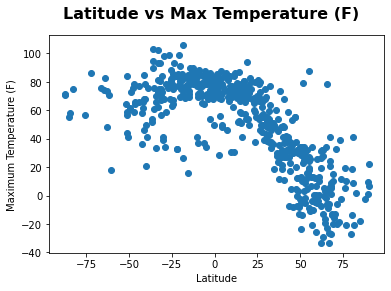

In [99]:
#Scatterplots - Temperature (F) vs. Latitude

plt.scatter(city_df_clean["Lat"],city_df_clean["Max_Temp"])
plt.xlabel("Latitude")
plt.ylabel("Maximum Temperature (F)")
plt.suptitle("Latitude vs Max Temperature (F)", fontsize=16, fontweight="bold")
plt.savefig("output_data/chart1.png")
plt.show()


As we look at the relationship between temperature in Farenheit and Latitude, we can observe that the highest MAx Temperatures take place closer to Latitude 0, which represents the equator. The further away from zero, the closer a latitude point is to either pole. We can observe quickly decreasing temperatres in the highest latitudes, very close to the North Pole. The southernmost areas of the Suthern Hmisphere are very sparesely populated, hence the reduced number of datapoints.

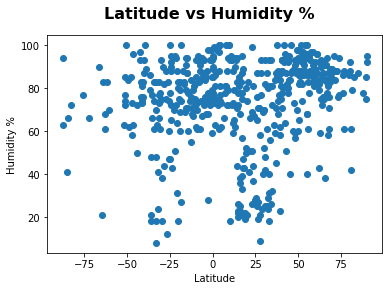

In [100]:
plt.scatter(city_df_clean["Lat"],city_df_clean["Humidity"])
plt.xlabel("Latitude")
plt.ylabel("Humidity %")
plt.suptitle("Latitude vs Humidity %", fontsize=16, fontweight="bold")
plt.savefig("output_data/chart2.png")
plt.show()

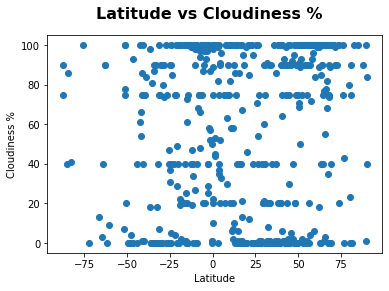

In [101]:
plt.scatter(city_df_clean["Lat"],city_df_clean["Cloudiness"])
plt.xlabel("Latitude")
plt.ylabel("Cloudiness %")
plt.suptitle("Latitude vs Cloudiness %", fontsize=16, fontweight="bold")
plt.savefig("output_data/chart3.png")
plt.show()

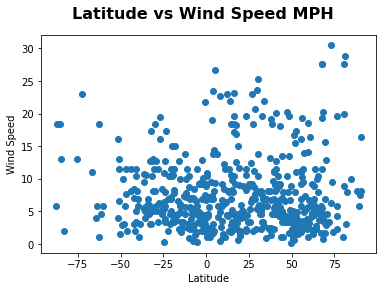

In [102]:
plt.scatter(city_df_clean["Lat"],city_df_clean["Wind_Speed"])
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.suptitle("Latitude vs Wind Speed MPH", fontsize=16, fontweight="bold")
plt.savefig("output_data/chart4.png")
plt.show()

163

In [120]:
#Separate North and South Data

city_df_clean_south = city_df_clean[city_df_clean["Lat"]<0]
city_df_clean_north = city_df_clean[city_df_clean["Lat"]>0]
len(city_df_clean_south)
#city_df_clean_south.head()
#len(city_df_clean_north)
#city_df_clean_north.head()


184

R squared: 0.21091573497430038


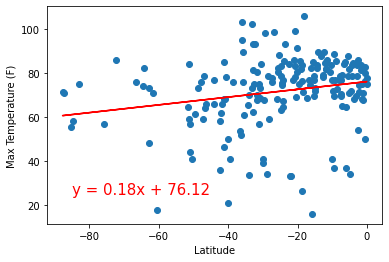

In [122]:

x_values = city_df_clean_south["Lat"].astype(float)
y_values = city_df_clean_south["Max_Temp"].astype(float)


(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))


# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
plt.scatter(x_values,y_values)

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-85,25),fontsize=15,color="red")

# Label plot
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')

# Print r square value
print(f"R squared: {rvalue}")

# Show plot
plt.show()


R squared: -0.8272433405842334


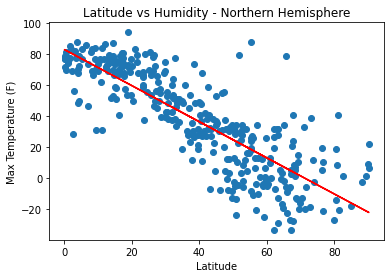

In [134]:

x_values = city_df_clean_north["Lat"].astype(float)
y_values = city_df_clean_north["Max_Temp"].astype(float)


(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))


# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
plt.scatter(x_values,y_values)

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,-40),fontsize=15,color="red")

# Label plot
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title("Latitude vs Humidity - Northern Hemisphere")

# Print r square value
print(f"R squared: {rvalue}")

# Show plot
plt.show()

R squared: 0.15011124373053766


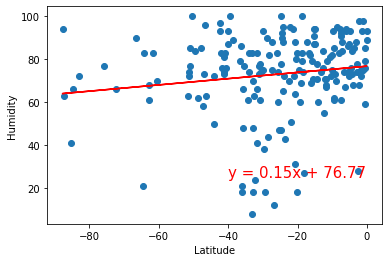

In [126]:

x_values = city_df_clean_south["Lat"].astype(float)
y_values = city_df_clean_south["Humidity"].astype(float)


(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))


# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
plt.scatter(x_values,y_values)

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-40,25),fontsize=15,color="red")

# Label plot
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title("Latitude vs Humidity - Southern Hemisphere")

# Print r square value
print(f"R squared: {rvalue}")

# Show plot
plt.show()

R squared: 0.2585804705641735


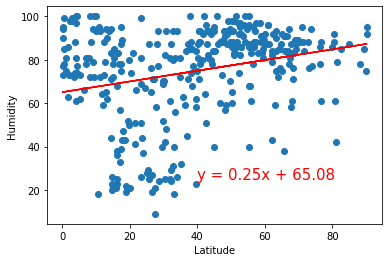

In [127]:

x_values = city_df_clean_north["Lat"].astype(float)
y_values = city_df_clean_north["Humidity"].astype(float)


(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))


# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
plt.scatter(x_values,y_values)

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(40,25),fontsize=15,color="red")

# Label plot
plt.xlabel('Latitude')
plt.ylabel('Humidity')

# Print r square value
print(f"R squared: {rvalue}")

# Show plot
plt.show()

R squared: 0.16715363773106828


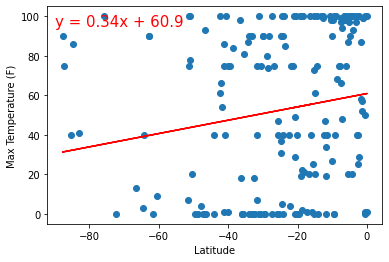

In [128]:

x_values = city_df_clean_south["Lat"].astype(float)
y_values = city_df_clean_south["Cloudiness"].astype(float)


(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))


# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
plt.scatter(x_values,y_values)

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-90,95),fontsize=15,color="red")

# Label plot
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')

# Print r square value
print(f"R squared: {rvalue}")

# Show plot
plt.show()

R squared: 0.21177857196741662


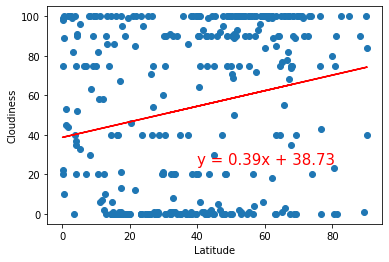

In [130]:
x_values = city_df_clean_north["Lat"].astype(float)
y_values = city_df_clean_north["Cloudiness"].astype(float)


(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))


# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
plt.scatter(x_values,y_values)

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(40,25),fontsize=15,color="red")

# Label plot
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')

# Print r square value
print(f"R squared: {rvalue}")

# Show plot
plt.show()

R squared: -0.2612844815182149


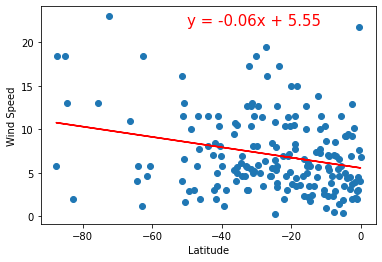

In [132]:

x_values = city_df_clean_south["Lat"].astype(float)
y_values = city_df_clean_south["Wind_Speed"].astype(float)


(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))


# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
plt.scatter(x_values,y_values)

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,22),fontsize=15,color="red")

# Label plot
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')

# Print r square value
print(f"R squared: {rvalue}")

# Show plot
plt.show()

R squared: -0.2612844815182149


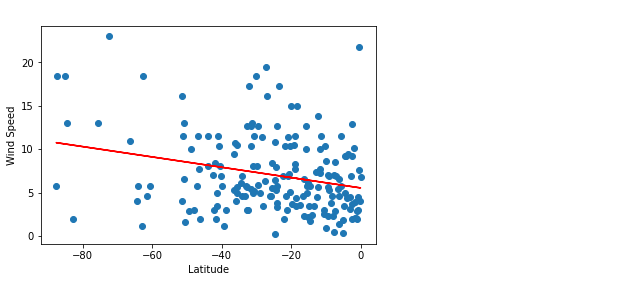

In [133]:
x_values_8 = city_df_clean_north["Lat"].astype(float)
y_values_8 = city_df_clean_north["Wind_Speed"].astype(float)


(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))


# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
plt.scatter(x_values,y_values)

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(40,25),fontsize=15,color="red")

# Label plot
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')

# Print r square value
print(f"R squared: {rvalue}")

# Show plot
plt.show()